# All Saxophones, Brass OK: CNN

* model = CNN
* target = ALL SAXES

Use CNN model to classify whether or not a saxophone is playing in a sample, samples including brass instruments are left in the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import AUC, Recall
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, \
     roc_curve, roc_auc_score

from _common import NUM_LABEL_COLS, RANDOM_SEED
from _all_saxes_brass_ok_lmsc import TEST_SIZE, VALIDATION_SIZE, \
    BANDS, TIME_SLICES, master, lmss, data, target

Reading lms_data_0.pkl...
(857, 9230)
Reading lms_data_1.pkl...
(867, 9230)
Appending 1...
Reading lms_data_2.pkl...
(873, 9230)
Appending 2...
Reading lms_data_3.pkl...
(882, 9230)
Appending 3...
Reading lms_data_4.pkl...
(874, 9230)
Appending 4...
Reading lms_data_5.pkl...
(859, 9230)
Appending 5...
Reading lms_data_6.pkl...
(877, 9230)
Appending 6...
Reading lms_data_7.pkl...
(867, 9230)
Appending 7...
Reading lms_data_8.pkl...
(871, 9230)
Appending 8...
Making labels...
(7827, 9231)
Selecting columns...
(7827, 9216)
Trying to make numpy...
Applying scaler...
Done


In [2]:
x_train, x_test, y_train, y_test = \
     train_test_split(data, target,
                      test_size=TEST_SIZE,
                      random_state=RANDOM_SEED)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6261, 9216)
(1566, 9216)
(6261,)
(1566,)


In [4]:
# Reshape for input to 2D convolutional layer
x_train = x_train.reshape(x_train.shape[0], BANDS, TIME_SLICES, 1)
x_test = x_test.reshape(x_test.shape[0], BANDS, TIME_SLICES, 1)

In [5]:
dependencies = {
    'recall': Recall
}

fn = './data/keras_models/tenor_cnn/tenor_cnn_G.h5'
model = load_model(fn, custom_objects=dependencies, compile=False)

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall'), 'accuracy'])

In [7]:
# auc, 
loss, recall, accuracy = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))
print('Accuracy: %.2f' % (accuracy * 100))

49/49 [==============================] - 10s 210ms/step - loss: 0.4956 - recall: 0.9328 - accuracy: 0.8570
Recall: 93.28
Accuracy: 85.70


In [8]:
probas_pred = model.predict(x_test)

In [9]:
precision, recall, threshold = precision_recall_curve(y_test, probas_pred)

In [10]:
print(probas_pred.shape)
print(precision.shape)
print(recall.shape)

(1566, 1)
(1501,)
(1501,)


Text(0.5, 1.0, 'Precision-Recall Curve')

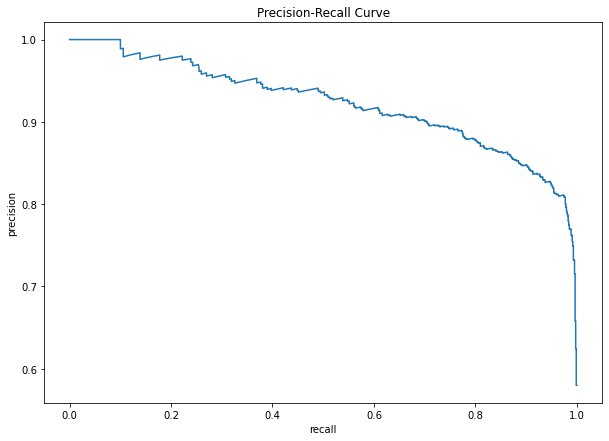

In [11]:
fig = plt.figure(figsize=(10, 7))    
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("Precision-Recall Curve")

In [12]:
fpr, tpr, threshold = roc_curve(y_test, probas_pred)
auc = roc_auc_score(y_test, probas_pred)

Text(0.5, 1.0, 'ROC Curve: AUC = 0.919')

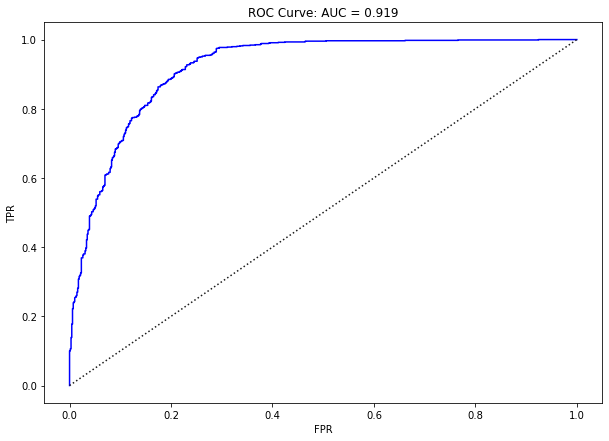

In [13]:
fig = plt.figure(figsize=(10, 7))    
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], ':', color='0.1')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve: AUC = {:.3f}".format(auc)) 